# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
# env = UnityEnvironment(file_name="/home/arasdar/VisualBanana_Linux/Banana.x86")
env = UnityEnvironment(file_name="/home/arasdar/Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
# print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
# print(state.shape, len(env_info.vector_observations), env_info.vector_observations.shape)

Number of agents: 1
Number of actions: 4
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        print(state.shape)
        break
    
print("Score: {}".format(score))

(37,)
Score: 0.0


When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    #print(state)
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 3.0


In [8]:
# In this one we should define and detect GPUs for tensorflow
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.1
Default GPU Device: 


In [9]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
batch = []
while True: # infinite number of steps
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    #print(state, action, reward, done)
    batch.append([action, state, reward, done])
    if done:                                       # exit loop if episode finished
        break
    
# print("Score: {}".format(score))

In [10]:
batch[0], batch[0][1].shape

([3, array([0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        , 1.        , 0.        , 0.        , 0.55250424,
         0.        , 1.        , 0.        , 0.        , 0.35652775,
         1.        , 0.        , 0.        , 0.        , 0.40146229,
         0.        , 1.        , 0.        , 0.        , 0.39749894,
         1.        , 0.        , 0.        , 0.        , 0.24460451,
         1.        , 0.        , 0.        , 0.        , 0.15436889,
         0.        , 0.        ]), 0.0, False], (37,))

In [11]:
batch[0][1].shape

(37,)

In [12]:
batch[0]

[3, array([0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.55250424,
        0.        , 1.        , 0.        , 0.        , 0.35652775,
        1.        , 0.        , 0.        , 0.        , 0.40146229,
        0.        , 1.        , 0.        , 0.        , 0.39749894,
        1.        , 0.        , 0.        , 0.        , 0.24460451,
        1.        , 0.        , 0.        , 0.        , 0.15436889,
        0.        , 0.        ]), 0.0, False]

In [13]:
actions = np.array([each[0] for each in batch])
states = np.array([each[1] for each in batch])
rewards = np.array([each[2] for each in batch])
dones = np.array([each[3] for each in batch])
# infos = np.array([each[4] for each in batch])

In [17]:
# print(rewards[:])
print(np.array(rewards).shape, np.array(states).shape, np.array(actions).shape, np.array(dones).shape)
print(np.array(rewards).dtype, np.array(states).dtype, np.array(actions).dtype, np.array(dones).dtype)
print(np.max(np.array(actions)), np.min(np.array(actions)), 
      (np.max(np.array(actions)) - np.min(np.array(actions)))+1)
print(np.max(np.array(rewards)), np.min(np.array(rewards)))
print(np.max(np.array(states)), np.min(np.array(states)))

(300,) (300, 37) (300,) (300,)
float64 float64 int64 bool
3 0 4
1.0 0.0
10.537452697753906 -10.25605297088623


In [18]:
def model_input(state_size):
    actions = tf.placeholder(tf.int32, [None], name='actions')
    states = tf.placeholder(tf.float32, [None, state_size], name='states')
    targetQs = tf.placeholder(tf.float32, [None], name='targetQs')
    return actions, states, targetQs

In [19]:
# Generator: Generating/prediting the actions
def generator(states, action_size, hidden_size, reuse=False, alpha=0.1, training=False):
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        h1 = tf.layers.dense(inputs=states, units=hidden_size)
        bn1 = tf.layers.batch_normalization(h1, training=training)        
        nl1 = tf.maximum(alpha * bn1, bn1)
        
        # Second fully connected layer
        h2 = tf.layers.dense(inputs=nl1, units=hidden_size)
        bn2 = tf.layers.batch_normalization(h2, training=training)        
        nl2 = tf.maximum(alpha * bn2, bn2)
        
        # Output layer
        logits = tf.layers.dense(inputs=nl2, units=action_size)        
        #predictions = tf.nn.softmax(logits)

        # return actions logits
        return logits

In [20]:
def model_loss(actions, states, targetQs, # model input
               action_size, hidden_size): # model init
    actions_logits = generator(states=states, hidden_size=hidden_size, action_size=action_size)
    actions_onehot = tf.one_hot(indices=actions, depth=action_size, dtype=actions_logits.dtype)
    Qs = tf.reduce_max(tf.multiply(actions_logits[:-1], actions_onehot[1:]), axis=1)
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Qs, labels=tf.nn.sigmoid(targetQs[1:])))    
    #loss = tf.reduce_mean(tf.square(Qs - targetQs[1:]))
    #loss = tf.reduce_mean(tf.square(Qs[:-1] - targetQs[2:]))
    return actions_logits, loss

In [21]:
def model_opt(loss, learning_rate):
    """
    Get optimization operations in order
    :param loss: Generator loss Tensor for action prediction
    :param learning_rate: Learning Rate Placeholder
    :return: A tuple of (qfunction training, generator training, discriminator training)
    """
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): # Required for batchnorm (BN)
        opt = tf.train.AdamOptimizer(learning_rate).minimize(loss, var_list=g_vars)

    return opt

In [22]:
class Model:
    def __init__(self, state_size, action_size, hidden_size, learning_rate):

        # Data of the Model: make the data available inside the framework
        self.actions, self.states, self.targetQs = model_input(state_size=state_size)

        # Create the Model: calculating the loss and forwad pass
        self.actions_logits, self.loss = model_loss(
            action_size=action_size, hidden_size=hidden_size, # model init parameters
            states=self.states, actions=self.actions, targetQs=self.targetQs) # model input

        # Update the model: backward pass and backprop
        self.opt = model_opt(loss=self.loss, learning_rate=learning_rate)

In [23]:
from collections import deque

class Memory():    
    def __init__(self, max_size = 1000):
        self.buffer = deque(maxlen=max_size)

In [24]:
print('state size:{}'.format(states.shape), 
      'actions:{}'.format(actions.shape)) 
print(np.max(actions) - np.min(actions)+1)

state size:(300, 37) actions:(300,)
4


In [38]:
# Training parameters
# train_episodes = 1             # max number of episodes to learn from
# max_steps = 3000000000         # max steps in an episode
learning_rate = 0.001          # learning rate for adam

# Exploration parameters
explore_start = 1.0            # exploration probability at start
explore_stop = 0.01            # minimum exploration probability 
decay_rate = 0.0001            # exponential decay rate for exploration prob

# Network parameters
state_size = 37                # number of units for the input state/observation -- simulation
action_size = 4                # number of units for the output actions -- simulation
hidden_size = 64               # number of units in each Q-network hidden layer -- simulation
batch_size = 1000              # number of samples in the memory/ experience as mini-batch size

In [39]:
# Reset/init the graph/session
tf.reset_default_graph()

# Init the model
model = Model(action_size=action_size, hidden_size=hidden_size, state_size=state_size, learning_rate=learning_rate)

# Init the memory
memory = Memory(max_size=batch_size)

In [41]:
# env_info = 
env.reset(train_mode=True)[brain_name] # reset the environment

#while True: # infinite number of steps
for _ in range(batch_size):
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    memory.buffer.append([action, state, done])
    if done:                                       # exit loop if episode finished
        #env_info = 
        env.reset(train_mode=True)[brain_name] # reset the environment

In [42]:
# Now train with experiences
saver = tf.train.Saver()
rewards_list = [] # accuracy
loss_list = [] # loss

# TF session for training
with tf.Session() as sess:
    
    # Initialize/restore variables
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, 'checkpoints/model-nav.ckpt')    
    #saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    # Explore or exploit parameter
    total_step = 0
    
    # Training episodes/epochs
    for ep in range(2000):
        
        # Start new episode
        #env.reset()
        #env_info = 
        env.reset(train_mode=True)[brain_name] # reset the environment        
        total_reward = 0
        loss_batch = []

        # Training steps/batches
        #for _ in range(max_steps): # start=0, step=1, stop=max_steps/done/reward
        while True:
            # Explore (Env) or Exploit (Model)
            total_step += 1
            explore_p = explore_stop + (explore_start - explore_stop) * np.exp(-decay_rate * total_step) 
            if explore_p > np.random.rand():
                # Make a random action
                #action = env.action_space.sample()
                action = np.random.randint(action_size)        # select an action
            else:
                # Get action from model
                action_logits = sess.run(model.actions_logits, feed_dict={model.states: state.reshape([1, -1])})
                action = np.argmax(action_logits)
            #state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            memory.buffer.append([action, state, done])
            total_reward += reward
            
            # Batch from NEW memory
            batch = memory.buffer
            actions = np.array([each[0] for each in batch])
            states = np.array([each[1] for each in batch])
            dones = np.array([each[2] for each in batch])
            
            # Calculate targetQs/nextQs
            actions_logits = sess.run(model.actions_logits, feed_dict={model.states: states})
            Qs = np.max(actions_logits, axis=1)
            targetQs = Qs * (1 - dones.astype(float))
            loss, _ = sess.run([model.loss, model.opt], feed_dict = {model.actions: actions,
                                                                     model.states: states,
                                                                     model.targetQs: targetQs})
            loss_batch.append(loss)
            if done is True:
                break
                
        # At the end of each episode/epoch
        print('Episode: {}'.format(ep),
              'Total reward: {}'.format(total_reward),
              'Average loss: {:.9f}'.format(np.mean(loss_batch)),
              'Explore P: {:.9f}'.format(explore_p))
        # Plotting loss and reward/acc
        rewards_list.append((ep, total_reward))
        loss_list.append((ep, np.mean(loss_batch)))
        
    # At the end of all training episodes/epochs
    saver.save(sess, 'checkpoints/model-nav.ckpt') 

Episode: 0 Total reward: 1.0 Average loss: 0.082005568 Explore P: 0.970741078
Episode: 1 Total reward: 0.0 Average loss: 0.003912160 Explore P: 0.942346888
Episode: 2 Total reward: 1.0 Average loss: 0.003585745 Explore P: 0.914791873
Episode: 3 Total reward: 0.0 Average loss: 0.002743948 Explore P: 0.888051232
Episode: 4 Total reward: 2.0 Average loss: 0.003112026 Explore P: 0.862100897
Episode: 5 Total reward: 1.0 Average loss: 0.002880048 Explore P: 0.836917509
Episode: 6 Total reward: 0.0 Average loss: 0.002880277 Explore P: 0.812478404
Episode: 7 Total reward: 1.0 Average loss: 0.003482430 Explore P: 0.788761582
Episode: 8 Total reward: -1.0 Average loss: 0.003046001 Explore P: 0.765745699
Episode: 9 Total reward: 2.0 Average loss: 0.003337937 Explore P: 0.743410038
Episode: 10 Total reward: 1.0 Average loss: 0.002923023 Explore P: 0.721734496
Episode: 11 Total reward: 1.0 Average loss: 0.002601919 Explore P: 0.700699563
Episode: 12 Total reward: 1.0 Average loss: 0.002873727 Explo

Episode: 104 Total reward: 0.0 Average loss: 0.005418715 Explore P: 0.052423606
Episode: 105 Total reward: 1.0 Average loss: 0.007170116 Explore P: 0.051169799
Episode: 106 Total reward: 0.0 Average loss: 0.006779387 Explore P: 0.049953047
Episode: 107 Total reward: 0.0 Average loss: 0.005487750 Explore P: 0.048772256
Episode: 108 Total reward: 1.0 Average loss: 0.004277959 Explore P: 0.047626363
Episode: 109 Total reward: 1.0 Average loss: 0.003376219 Explore P: 0.046514336
Episode: 110 Total reward: -2.0 Average loss: 0.003212612 Explore P: 0.045435174
Episode: 111 Total reward: 0.0 Average loss: 0.005165759 Explore P: 0.044387906
Episode: 112 Total reward: 0.0 Average loss: 0.005001122 Explore P: 0.043371590
Episode: 113 Total reward: 0.0 Average loss: 0.005007234 Explore P: 0.042385311
Episode: 114 Total reward: -1.0 Average loss: 0.004890116 Explore P: 0.041428180
Episode: 115 Total reward: 0.0 Average loss: 0.004275976 Explore P: 0.040499337
Episode: 116 Total reward: 0.0 Average

Episode: 206 Total reward: 1.0 Average loss: 0.008575886 Explore P: 0.011989145
Episode: 207 Total reward: 0.0 Average loss: 0.009621646 Explore P: 0.011930357
Episode: 208 Total reward: -2.0 Average loss: 0.005930646 Explore P: 0.011873306
Episode: 209 Total reward: 6.0 Average loss: 0.007593409 Explore P: 0.011817942
Episode: 210 Total reward: 0.0 Average loss: 0.005337570 Explore P: 0.011764213
Episode: 211 Total reward: -2.0 Average loss: 0.005819669 Explore P: 0.011712073
Episode: 212 Total reward: 6.0 Average loss: 0.005537412 Explore P: 0.011661474
Episode: 213 Total reward: -2.0 Average loss: 0.004943839 Explore P: 0.011612370
Episode: 214 Total reward: 3.0 Average loss: 0.003031864 Explore P: 0.011564717
Episode: 215 Total reward: 0.0 Average loss: 0.002636309 Explore P: 0.011518473
Episode: 216 Total reward: -3.0 Average loss: 0.005697502 Explore P: 0.011473595
Episode: 217 Total reward: 0.0 Average loss: 0.006106289 Explore P: 0.011430044
Episode: 218 Total reward: 0.0 Avera

Episode: 309 Total reward: -1.0 Average loss: 0.005787408 Explore P: 0.010090510
Episode: 310 Total reward: -3.0 Average loss: 0.004573601 Explore P: 0.010087835
Episode: 311 Total reward: -1.0 Average loss: 0.004479950 Explore P: 0.010085239
Episode: 312 Total reward: -1.0 Average loss: 0.003793813 Explore P: 0.010082720
Episode: 313 Total reward: 0.0 Average loss: 0.003223396 Explore P: 0.010080275
Episode: 314 Total reward: -6.0 Average loss: 0.003158770 Explore P: 0.010077903
Episode: 315 Total reward: 0.0 Average loss: 0.002608769 Explore P: 0.010075600
Episode: 316 Total reward: 0.0 Average loss: 0.002569395 Explore P: 0.010073366
Episode: 317 Total reward: -3.0 Average loss: 0.002497981 Explore P: 0.010071198
Episode: 318 Total reward: -1.0 Average loss: 0.002480387 Explore P: 0.010069093
Episode: 319 Total reward: -6.0 Average loss: 0.004417809 Explore P: 0.010067051
Episode: 320 Total reward: -1.0 Average loss: 0.004574806 Explore P: 0.010065070
Episode: 321 Total reward: -1.0

Episode: 411 Total reward: 0.0 Average loss: 0.034249675 Explore P: 0.010004244
Episode: 412 Total reward: -2.0 Average loss: 0.009585474 Explore P: 0.010004118
Episode: 413 Total reward: 3.0 Average loss: 0.014787750 Explore P: 0.010003997
Episode: 414 Total reward: -2.0 Average loss: 0.008645126 Explore P: 0.010003879
Episode: 415 Total reward: 0.0 Average loss: 0.008324224 Explore P: 0.010003764
Episode: 416 Total reward: 0.0 Average loss: 0.005916650 Explore P: 0.010003653
Episode: 417 Total reward: 0.0 Average loss: 0.005802000 Explore P: 0.010003545
Episode: 418 Total reward: 0.0 Average loss: 0.005027888 Explore P: 0.010003440
Episode: 419 Total reward: 0.0 Average loss: 0.005935641 Explore P: 0.010003338
Episode: 420 Total reward: 0.0 Average loss: 0.006872763 Explore P: 0.010003240
Episode: 421 Total reward: 1.0 Average loss: 0.009153476 Explore P: 0.010003144
Episode: 422 Total reward: -1.0 Average loss: 0.007292240 Explore P: 0.010003051
Episode: 423 Total reward: 0.0 Averag

Episode: 514 Total reward: 0.0 Average loss: 0.005987152 Explore P: 0.010000193
Episode: 515 Total reward: 0.0 Average loss: 0.003318171 Explore P: 0.010000187
Episode: 516 Total reward: 1.0 Average loss: 0.003932383 Explore P: 0.010000182
Episode: 517 Total reward: 2.0 Average loss: 0.004500999 Explore P: 0.010000176
Episode: 518 Total reward: -2.0 Average loss: 0.004799596 Explore P: 0.010000171
Episode: 519 Total reward: 1.0 Average loss: 0.008410360 Explore P: 0.010000166
Episode: 520 Total reward: 1.0 Average loss: 0.008890964 Explore P: 0.010000161
Episode: 521 Total reward: -1.0 Average loss: 0.010463728 Explore P: 0.010000157
Episode: 522 Total reward: -2.0 Average loss: 0.008030135 Explore P: 0.010000152
Episode: 523 Total reward: -3.0 Average loss: 0.005640310 Explore P: 0.010000147
Episode: 524 Total reward: -3.0 Average loss: 0.003547465 Explore P: 0.010000143
Episode: 525 Total reward: -2.0 Average loss: 0.003014635 Explore P: 0.010000139
Episode: 526 Total reward: -2.0 Av

Episode: 616 Total reward: -5.0 Average loss: 0.004478508 Explore P: 0.010000009
Episode: 617 Total reward: -1.0 Average loss: 0.003064415 Explore P: 0.010000009
Episode: 618 Total reward: -1.0 Average loss: 0.002570888 Explore P: 0.010000009
Episode: 619 Total reward: 0.0 Average loss: 0.008953921 Explore P: 0.010000008
Episode: 620 Total reward: 0.0 Average loss: 0.007972565 Explore P: 0.010000008
Episode: 621 Total reward: 0.0 Average loss: 0.006180406 Explore P: 0.010000008
Episode: 622 Total reward: 0.0 Average loss: 0.004817788 Explore P: 0.010000008
Episode: 623 Total reward: 1.0 Average loss: 0.005043079 Explore P: 0.010000007
Episode: 624 Total reward: 0.0 Average loss: 0.004668725 Explore P: 0.010000007
Episode: 625 Total reward: 2.0 Average loss: 0.005888027 Explore P: 0.010000007
Episode: 626 Total reward: -1.0 Average loss: 0.007546290 Explore P: 0.010000007
Episode: 627 Total reward: 1.0 Average loss: 0.010127221 Explore P: 0.010000007
Episode: 628 Total reward: -1.0 Aver

Episode: 718 Total reward: -2.0 Average loss: 0.007147713 Explore P: 0.010000000
Episode: 719 Total reward: -1.0 Average loss: 0.005910043 Explore P: 0.010000000
Episode: 720 Total reward: 1.0 Average loss: 0.005114684 Explore P: 0.010000000
Episode: 721 Total reward: 0.0 Average loss: 0.003974101 Explore P: 0.010000000
Episode: 722 Total reward: 1.0 Average loss: 0.006211379 Explore P: 0.010000000
Episode: 723 Total reward: 0.0 Average loss: 0.006440932 Explore P: 0.010000000
Episode: 724 Total reward: -1.0 Average loss: 0.007618483 Explore P: 0.010000000
Episode: 725 Total reward: 1.0 Average loss: 0.005816022 Explore P: 0.010000000
Episode: 726 Total reward: -1.0 Average loss: 0.007553733 Explore P: 0.010000000
Episode: 727 Total reward: -4.0 Average loss: 0.006241217 Explore P: 0.010000000
Episode: 728 Total reward: 2.0 Average loss: 0.006847227 Explore P: 0.010000000
Episode: 729 Total reward: 0.0 Average loss: 0.006807211 Explore P: 0.010000000
Episode: 730 Total reward: -2.0 Ave

Episode: 820 Total reward: 1.0 Average loss: 0.006590344 Explore P: 0.010000000
Episode: 821 Total reward: 1.0 Average loss: 0.007240262 Explore P: 0.010000000
Episode: 822 Total reward: 0.0 Average loss: 0.006044451 Explore P: 0.010000000
Episode: 823 Total reward: 0.0 Average loss: 0.006027645 Explore P: 0.010000000
Episode: 824 Total reward: 2.0 Average loss: 0.006875703 Explore P: 0.010000000
Episode: 825 Total reward: -1.0 Average loss: 0.010127162 Explore P: 0.010000000
Episode: 826 Total reward: -1.0 Average loss: 0.013801388 Explore P: 0.010000000
Episode: 827 Total reward: -2.0 Average loss: 0.009919833 Explore P: 0.010000000
Episode: 828 Total reward: 3.0 Average loss: 0.007336367 Explore P: 0.010000000
Episode: 829 Total reward: 1.0 Average loss: 0.003969812 Explore P: 0.010000000
Episode: 830 Total reward: 0.0 Average loss: 0.002751968 Explore P: 0.010000000
Episode: 831 Total reward: -1.0 Average loss: 0.003255627 Explore P: 0.010000000
Episode: 832 Total reward: 0.0 Avera

Episode: 923 Total reward: 1.0 Average loss: 0.008637697 Explore P: 0.010000000
Episode: 924 Total reward: 2.0 Average loss: 0.008207717 Explore P: 0.010000000
Episode: 925 Total reward: 1.0 Average loss: 0.005803993 Explore P: 0.010000000
Episode: 926 Total reward: 2.0 Average loss: 0.005475353 Explore P: 0.010000000
Episode: 927 Total reward: 0.0 Average loss: 0.004447681 Explore P: 0.010000000
Episode: 928 Total reward: 0.0 Average loss: 0.004189911 Explore P: 0.010000000
Episode: 929 Total reward: 0.0 Average loss: 0.002741806 Explore P: 0.010000000
Episode: 930 Total reward: -1.0 Average loss: 0.004353492 Explore P: 0.010000000
Episode: 931 Total reward: 1.0 Average loss: 0.006632474 Explore P: 0.010000000
Episode: 932 Total reward: 1.0 Average loss: 0.006620701 Explore P: 0.010000000
Episode: 933 Total reward: 1.0 Average loss: 0.005676846 Explore P: 0.010000000
Episode: 934 Total reward: 0.0 Average loss: 0.003200953 Explore P: 0.010000000
Episode: 935 Total reward: 1.0 Average 

Episode: 1025 Total reward: 0.0 Average loss: 0.011236507 Explore P: 0.010000000
Episode: 1026 Total reward: 1.0 Average loss: 0.015296252 Explore P: 0.010000000
Episode: 1027 Total reward: -1.0 Average loss: 0.010565333 Explore P: 0.010000000
Episode: 1028 Total reward: -3.0 Average loss: 0.006958974 Explore P: 0.010000000
Episode: 1029 Total reward: -4.0 Average loss: 0.004413975 Explore P: 0.010000000
Episode: 1030 Total reward: 0.0 Average loss: 0.003909593 Explore P: 0.010000000
Episode: 1031 Total reward: 0.0 Average loss: 0.005789389 Explore P: 0.010000000
Episode: 1032 Total reward: -2.0 Average loss: 0.009533288 Explore P: 0.010000000
Episode: 1033 Total reward: -3.0 Average loss: 0.010685690 Explore P: 0.010000000
Episode: 1034 Total reward: -3.0 Average loss: 0.011968056 Explore P: 0.010000000
Episode: 1035 Total reward: -4.0 Average loss: 0.008191095 Explore P: 0.010000000
Episode: 1036 Total reward: -1.0 Average loss: 0.005608324 Explore P: 0.010000000
Episode: 1037 Total 

Episode: 1126 Total reward: 0.0 Average loss: 0.004313665 Explore P: 0.010000000
Episode: 1127 Total reward: 0.0 Average loss: 0.005895914 Explore P: 0.010000000
Episode: 1128 Total reward: 0.0 Average loss: 0.008309867 Explore P: 0.010000000
Episode: 1129 Total reward: 1.0 Average loss: 0.008409380 Explore P: 0.010000000
Episode: 1130 Total reward: -4.0 Average loss: 0.006029068 Explore P: 0.010000000
Episode: 1131 Total reward: 0.0 Average loss: 0.003162334 Explore P: 0.010000000
Episode: 1132 Total reward: 0.0 Average loss: 0.006713923 Explore P: 0.010000000
Episode: 1133 Total reward: 0.0 Average loss: 0.010020730 Explore P: 0.010000000
Episode: 1134 Total reward: 0.0 Average loss: 0.008907509 Explore P: 0.010000000
Episode: 1135 Total reward: -1.0 Average loss: 0.007648117 Explore P: 0.010000000
Episode: 1136 Total reward: 0.0 Average loss: 0.007515222 Explore P: 0.010000000
Episode: 1137 Total reward: -1.0 Average loss: 0.007976503 Explore P: 0.010000000
Episode: 1138 Total rewar

Episode: 1227 Total reward: 2.0 Average loss: 0.002635089 Explore P: 0.010000000
Episode: 1228 Total reward: 1.0 Average loss: 0.002692072 Explore P: 0.010000000
Episode: 1229 Total reward: 0.0 Average loss: 0.003654377 Explore P: 0.010000000
Episode: 1230 Total reward: 0.0 Average loss: 0.005277609 Explore P: 0.010000000
Episode: 1231 Total reward: 1.0 Average loss: 0.008027884 Explore P: 0.010000000
Episode: 1232 Total reward: 0.0 Average loss: 0.010364276 Explore P: 0.010000000
Episode: 1233 Total reward: 0.0 Average loss: 0.008281613 Explore P: 0.010000000
Episode: 1234 Total reward: -1.0 Average loss: 0.005529868 Explore P: 0.010000000
Episode: 1235 Total reward: 0.0 Average loss: 0.004782765 Explore P: 0.010000000
Episode: 1236 Total reward: 0.0 Average loss: 0.006385548 Explore P: 0.010000000
Episode: 1237 Total reward: 2.0 Average loss: 0.006619910 Explore P: 0.010000000
Episode: 1238 Total reward: 0.0 Average loss: 0.008480578 Explore P: 0.010000000
Episode: 1239 Total reward:

Episode: 1328 Total reward: 0.0 Average loss: 0.010051370 Explore P: 0.010000000
Episode: 1329 Total reward: 1.0 Average loss: 0.006037871 Explore P: 0.010000000
Episode: 1330 Total reward: -7.0 Average loss: 0.006484358 Explore P: 0.010000000
Episode: 1331 Total reward: 0.0 Average loss: 0.005121094 Explore P: 0.010000000
Episode: 1332 Total reward: -1.0 Average loss: 0.004452536 Explore P: 0.010000000
Episode: 1333 Total reward: -2.0 Average loss: 0.003279193 Explore P: 0.010000000
Episode: 1334 Total reward: 0.0 Average loss: 0.002875788 Explore P: 0.010000000
Episode: 1335 Total reward: -1.0 Average loss: 0.004992237 Explore P: 0.010000000
Episode: 1336 Total reward: 4.0 Average loss: 0.004281449 Explore P: 0.010000000
Episode: 1337 Total reward: -1.0 Average loss: 0.006537055 Explore P: 0.010000000
Episode: 1338 Total reward: 0.0 Average loss: 0.006700506 Explore P: 0.010000000
Episode: 1339 Total reward: 0.0 Average loss: 0.008276301 Explore P: 0.010000000
Episode: 1340 Total rew

Episode: 1429 Total reward: 0.0 Average loss: 0.008907354 Explore P: 0.010000000
Episode: 1430 Total reward: 1.0 Average loss: 0.007548661 Explore P: 0.010000000
Episode: 1431 Total reward: -2.0 Average loss: 0.005828073 Explore P: 0.010000000
Episode: 1432 Total reward: 3.0 Average loss: 0.003453104 Explore P: 0.010000000
Episode: 1433 Total reward: 5.0 Average loss: 0.005324950 Explore P: 0.010000000
Episode: 1434 Total reward: 9.0 Average loss: 0.005684716 Explore P: 0.010000000
Episode: 1435 Total reward: 5.0 Average loss: 0.005818073 Explore P: 0.010000000
Episode: 1436 Total reward: 8.0 Average loss: 0.003460889 Explore P: 0.010000000
Episode: 1437 Total reward: 12.0 Average loss: 0.002869834 Explore P: 0.010000000
Episode: 1438 Total reward: 2.0 Average loss: 0.003061686 Explore P: 0.010000000
Episode: 1439 Total reward: 4.0 Average loss: 0.002597146 Explore P: 0.010000000
Episode: 1440 Total reward: 0.0 Average loss: 0.003262245 Explore P: 0.010000000
Episode: 1441 Total reward

Episode: 1530 Total reward: 2.0 Average loss: 0.003278265 Explore P: 0.010000000
Episode: 1531 Total reward: 0.0 Average loss: 0.004644149 Explore P: 0.010000000
Episode: 1532 Total reward: -2.0 Average loss: 0.005596016 Explore P: 0.010000000
Episode: 1533 Total reward: 1.0 Average loss: 0.004885348 Explore P: 0.010000000
Episode: 1534 Total reward: -1.0 Average loss: 0.003460824 Explore P: 0.010000000
Episode: 1535 Total reward: 0.0 Average loss: 0.003044758 Explore P: 0.010000000
Episode: 1536 Total reward: 0.0 Average loss: 0.005079343 Explore P: 0.010000000
Episode: 1537 Total reward: 1.0 Average loss: 0.006842852 Explore P: 0.010000000
Episode: 1538 Total reward: 1.0 Average loss: 0.006509663 Explore P: 0.010000000
Episode: 1539 Total reward: -1.0 Average loss: 0.007843647 Explore P: 0.010000000
Episode: 1540 Total reward: 0.0 Average loss: 0.007350559 Explore P: 0.010000000
Episode: 1541 Total reward: 0.0 Average loss: 0.006027537 Explore P: 0.010000000
Episode: 1542 Total rewar

Episode: 1631 Total reward: 0.0 Average loss: 0.005119555 Explore P: 0.010000000
Episode: 1632 Total reward: 0.0 Average loss: 0.007201322 Explore P: 0.010000000
Episode: 1633 Total reward: 3.0 Average loss: 0.005319426 Explore P: 0.010000000
Episode: 1634 Total reward: 5.0 Average loss: 0.005536087 Explore P: 0.010000000
Episode: 1635 Total reward: 1.0 Average loss: 0.006069877 Explore P: 0.010000000
Episode: 1636 Total reward: 1.0 Average loss: 0.006219041 Explore P: 0.010000000
Episode: 1637 Total reward: 2.0 Average loss: 0.005946524 Explore P: 0.010000000
Episode: 1638 Total reward: -2.0 Average loss: 0.004985120 Explore P: 0.010000000
Episode: 1639 Total reward: 1.0 Average loss: 0.003430850 Explore P: 0.010000000
Episode: 1640 Total reward: -1.0 Average loss: 0.003268487 Explore P: 0.010000000
Episode: 1641 Total reward: 0.0 Average loss: 0.005135894 Explore P: 0.010000000
Episode: 1642 Total reward: 5.0 Average loss: 0.007376979 Explore P: 0.010000000
Episode: 1643 Total reward

Episode: 1732 Total reward: -1.0 Average loss: 0.010709891 Explore P: 0.010000000
Episode: 1733 Total reward: 1.0 Average loss: 0.007459213 Explore P: 0.010000000
Episode: 1734 Total reward: -1.0 Average loss: 0.007951166 Explore P: 0.010000000
Episode: 1735 Total reward: 3.0 Average loss: 0.007985891 Explore P: 0.010000000
Episode: 1736 Total reward: 0.0 Average loss: 0.007429414 Explore P: 0.010000000
Episode: 1737 Total reward: -1.0 Average loss: 0.008069392 Explore P: 0.010000000
Episode: 1738 Total reward: -1.0 Average loss: 0.006747271 Explore P: 0.010000000
Episode: 1739 Total reward: 0.0 Average loss: 0.006314416 Explore P: 0.010000000
Episode: 1740 Total reward: -1.0 Average loss: 0.005685989 Explore P: 0.010000000
Episode: 1741 Total reward: -2.0 Average loss: 0.005671916 Explore P: 0.010000000
Episode: 1742 Total reward: 1.0 Average loss: 0.007009896 Explore P: 0.010000000
Episode: 1743 Total reward: 1.0 Average loss: 0.006819489 Explore P: 0.010000000
Episode: 1744 Total re

Episode: 1833 Total reward: 1.0 Average loss: 0.006780215 Explore P: 0.010000000
Episode: 1834 Total reward: 2.0 Average loss: 0.006903623 Explore P: 0.010000000
Episode: 1835 Total reward: 0.0 Average loss: 0.005192522 Explore P: 0.010000000
Episode: 1836 Total reward: 0.0 Average loss: 0.004991870 Explore P: 0.010000000
Episode: 1837 Total reward: 4.0 Average loss: 0.005313328 Explore P: 0.010000000
Episode: 1838 Total reward: 10.0 Average loss: 0.004567859 Explore P: 0.010000000
Episode: 1839 Total reward: 0.0 Average loss: 0.005671914 Explore P: 0.010000000
Episode: 1840 Total reward: 4.0 Average loss: 0.006835119 Explore P: 0.010000000
Episode: 1841 Total reward: 2.0 Average loss: 0.008794721 Explore P: 0.010000000
Episode: 1842 Total reward: 2.0 Average loss: 0.009203523 Explore P: 0.010000000
Episode: 1843 Total reward: 0.0 Average loss: 0.007443304 Explore P: 0.010000000
Episode: 1844 Total reward: 1.0 Average loss: 0.006145399 Explore P: 0.010000000
Episode: 1845 Total reward:

Episode: 1934 Total reward: 0.0 Average loss: 0.006985563 Explore P: 0.010000000
Episode: 1935 Total reward: 1.0 Average loss: 0.007822294 Explore P: 0.010000000
Episode: 1936 Total reward: 2.0 Average loss: 0.006958354 Explore P: 0.010000000
Episode: 1937 Total reward: -1.0 Average loss: 0.008347309 Explore P: 0.010000000
Episode: 1938 Total reward: 2.0 Average loss: 0.007142537 Explore P: 0.010000000
Episode: 1939 Total reward: 0.0 Average loss: 0.005310793 Explore P: 0.010000000
Episode: 1940 Total reward: 5.0 Average loss: 0.003518037 Explore P: 0.010000000
Episode: 1941 Total reward: 2.0 Average loss: 0.002898870 Explore P: 0.010000000
Episode: 1942 Total reward: 2.0 Average loss: 0.002720315 Explore P: 0.010000000
Episode: 1943 Total reward: -1.0 Average loss: 0.003211123 Explore P: 0.010000000
Episode: 1944 Total reward: 1.0 Average loss: 0.004125207 Explore P: 0.010000000
Episode: 1945 Total reward: 0.0 Average loss: 0.005044664 Explore P: 0.010000000
Episode: 1946 Total reward

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

Text(0,0.5,'Total rewards')

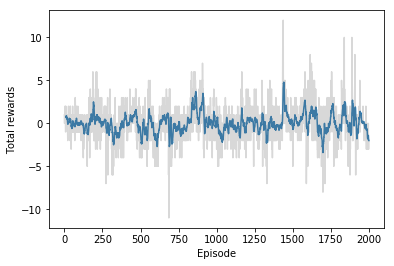

In [44]:
eps, arr = np.array(rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

Text(0,0.5,'Average losses')

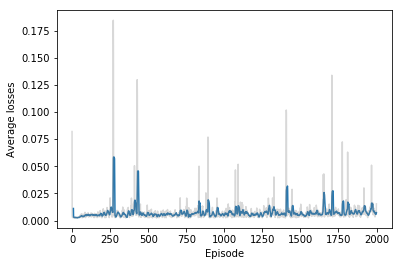

In [45]:
eps, arr = np.array(loss_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Average losses')

In [33]:
# # import gym
# # # env = gym.make('CartPole-v0')
# # env = gym.make('CartPole-v1')
# # # env = gym.make('Acrobot-v1')
# # # env = gym.make('MountainCar-v0')
# # # env = gym.make('Pendulum-v0')
# # # env = gym.make('Blackjack-v0')
# # # env = gym.make('FrozenLake-v0')
# # # env = gym.make('AirRaid-ram-v0')
# # # env = gym.make('AirRaid-v0')
# # # env = gym.make('BipedalWalker-v2')
# # # env = gym.make('Copy-v0')
# # # env = gym.make('CarRacing-v0')
# # # env = gym.make('Ant-v2') #mujoco
# # # env = gym.make('FetchPickAndPlace-v1') # mujoco required!

# with tf.Session() as sess:
#     #sess.run(tf.global_variables_initializer())
#     saver.restore(sess, 'checkpoints/model-nav.ckpt')    
#     #saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
#     # Episodes/epochs
#     for _ in range(1):
#         state = env.reset()
#         total_reward = 0

#         # Steps/batches
#         #for _ in range(111111111111111111):
#         while True:
#             env.render()
#             action_logits = sess.run(model.actions_logits, feed_dict={model.states: np.reshape(state, [1, -1])})
#             action = np.argmax(action_logits)
#             state, reward, done, _ = env.step(action)
#             total_reward += reward
#             if done:
#                 break
                
#         # Closing the env
#         print('total_reward: {:.2f}'.format(total_reward))
#         env.close()